In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

  Obtaining dependency information for matplotlib==3.7.2 from https://files.pythonhosted.org/packages/7e/2c/1e25437f4419f2828bbd213be42c8fd23a3b795c5c4bb776987d177fc615/matplotlib-3.7.2-cp311-cp311-macosx_10_12_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.7
    Uninstalling matplotlib-3.10.7:
      Successfully uninstalled matplotlib-3.10.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.15.1 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.


# Data Cleaning

In [128]:
df = pd.read_csv("Stocks.csv")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          342 non-null    object 
 1   Symbol        342 non-null    object 
 2   Sector        342 non-null    object 
 3   Price         341 non-null    float64
 4   Dividend      342 non-null    float64
 5   PE            341 non-null    float64
 6   EPS           341 non-null    float64
 7   52 week low   340 non-null    float64
 8   52 week high  341 non-null    float64
 9   Market Cap    342 non-null    float64
 10  EBITDA        342 non-null    float64
dtypes: float64(8), object(3)
memory usage: 29.5+ KB


In [130]:
df.isna().sum()

Name            0
Symbol          0
Sector          0
Price           1
Dividend        0
PE              1
EPS             1
52 week low     2
52 week high    1
Market Cap      0
EBITDA          0
dtype: int64

In [131]:
## Price
avePrice = df['Price'].mean()
## PE
avePE = df['PE'].mean()
## EPS
aveEPS = df['EPS'].mean()
## 52 week low
aveLow = df['52 week low'].mean()
## 52 week high
aveHigh = df['52 week high'].mean()
fill_values = {
    'Price': avePrice,
    'PE': avePE,
    'EPS': aveEPS,
    '52 week low': aveLow,
    '52 week high': aveHigh
}
new_df = df.fillna(fill_values)

In [132]:
for i in new_df.index:
  if new_df.loc[i,'EPS'] > 20:
    new_df.drop(i, inplace = True)

In [133]:
new_df['logPrice'] = np.log10(new_df['Price'])

In [134]:
new_df['Differences'] = new_df['52 week high'] - new_df['52 week low']

In [135]:
new_df['EBITDAbooleanValue'] = False
for i in new_df.index:
  if new_df.loc[i,'EBITDA'] > 1:
    new_df.loc[i, 'EBITDAbooleanValue'] = True
new_df['EBITDAbooleanValue'] = new_df['EBITDAbooleanValue'].astype(int)

In [136]:
new_df.loc[1,'Name'] = 'Huiting Wu'

In [137]:
# new_df.to_csv("Cleaned_Stocks.csv", index = False)

# Data Inspection

In [139]:
cd = pd.read_csv("Cleaned_Stocks.csv")
cd.isna().sum() # there is no missing value.

Name                  0
Symbol                0
Sector                0
Price                 0
Dividend              0
PE                    0
EPS                   0
52 week low           0
52 week high          0
Market Cap            0
EBITDA                0
logPrice              0
Differences           0
EBITDAbooleanValue    0
dtype: int64

In [140]:
cd.groupby(by = 'Sector').size()

Sector
Consumer Discretionary        55
Consumer Staples              25
Energy                         6
Financials                    59
Health Care                   34
Industrials                   51
Information Technology        38
Materials                     20
Real Estate                   27
Telecommunication Services     3
Utilities                     23
dtype: int64

In [141]:
cd.groupby(by = 'Sector').Differences.aggregate('mean').sort_values(ascending=True)

Sector
Telecommunication Services     9.936667
Utilities                     11.761338
Consumer Staples              18.865200
Energy                        19.945000
Consumer Discretionary        21.274196
Information Technology        24.308947
Real Estate                   26.793333
Financials                    27.044976
Health Care                   29.963824
Materials                     30.874000
Industrials                   31.816667
Name: Differences, dtype: float64

In [172]:
cd.groupby(by = 'Sector').EPS.aggregate('std').sort_values(ascending=True)

Sector
Telecommunication Services    1.026174
Utilities                     1.433574
Energy                        1.593675
Consumer Staples              2.022614
Consumer Discretionary        2.129783
Information Technology        2.427637
Real Estate                   2.585953
Health Care                   2.800441
Materials                     2.826266
Industrials                   3.171595
Financials                    3.553237
Name: EPS, dtype: float64

In [176]:
print(cd.sort_values(by='Dividend', ascending=False).head()[['Name', 'Dividend']])

                           Name  Dividend
157  Iron Mountain Incorporated      6.05
192                 Mattel Inc.      5.97
220                       ONEOK      5.44
263          Seagate Technology      5.15
327              Welltower Inc.      5.00


In [178]:
print(cd.sort_values(by ='EPS',ascending=True).head()[['Name', 'EPS']])

                           Name   EPS
167               Kinder Morgan  0.25
176     Leucadia National Corp.  0.34
198        Microchip Technology  0.41
157  Iron Mountain Incorporated  0.42
328            Western Union Co  0.51


In [145]:
for i in cd.index:
  if cd.loc[i, 'Dividend'] == 0:
    print(cd.loc[i, 'Name'])

E*Trade
Express Scripts
Lumen Technologies
Mylan N.V.
United Continental Holdings
Varian Medical Systems


/Users/waiting/anaconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.


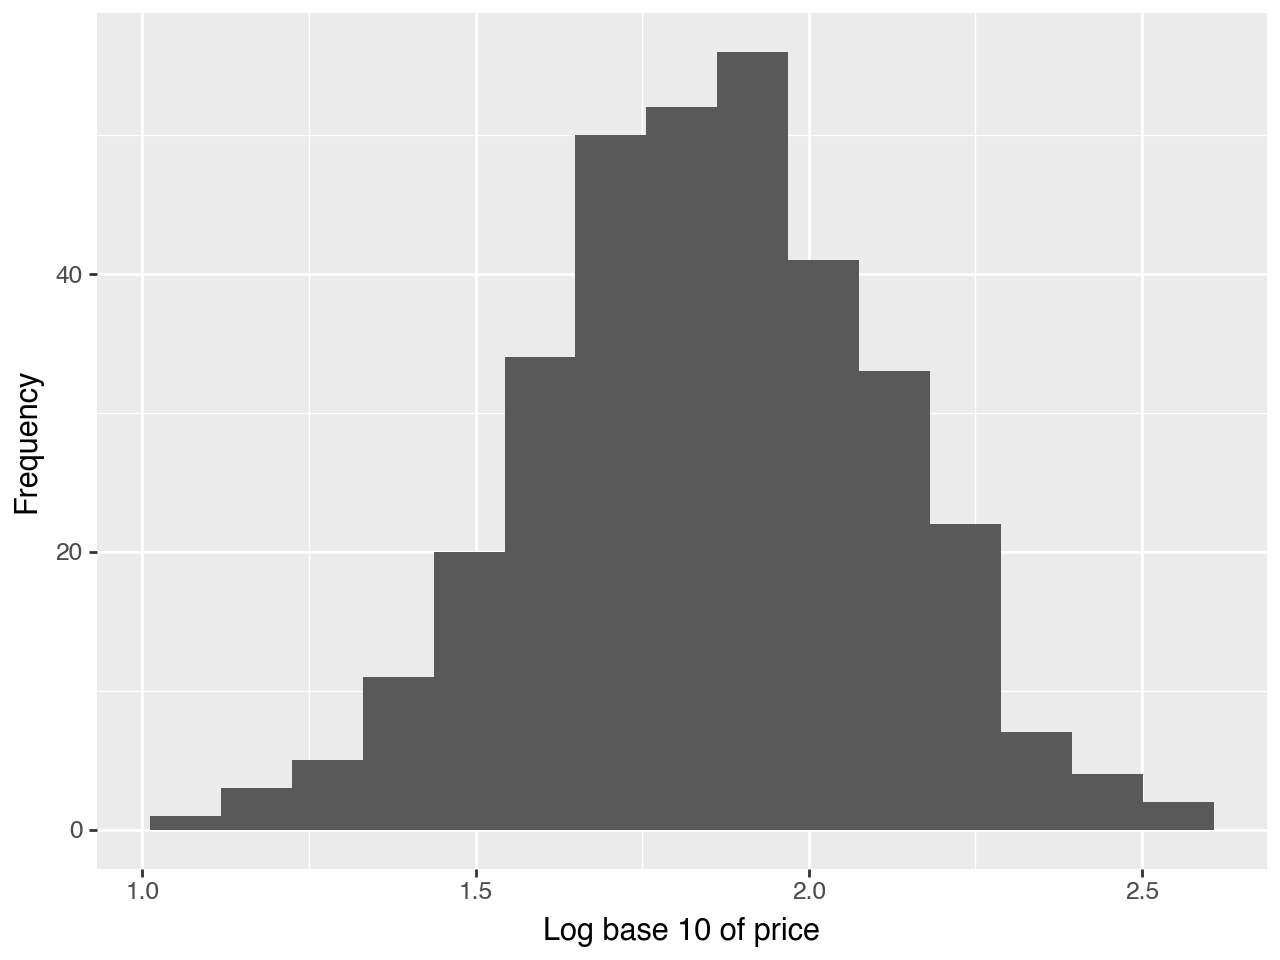

In [190]:
ggplot(cd) + aes(x = 'logPrice') + geom_histogram() + xlab('Log base 10 of price') + ylab('Frequency')

/Users/waiting/anaconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 79'. Pick better value with 'binwidth'.


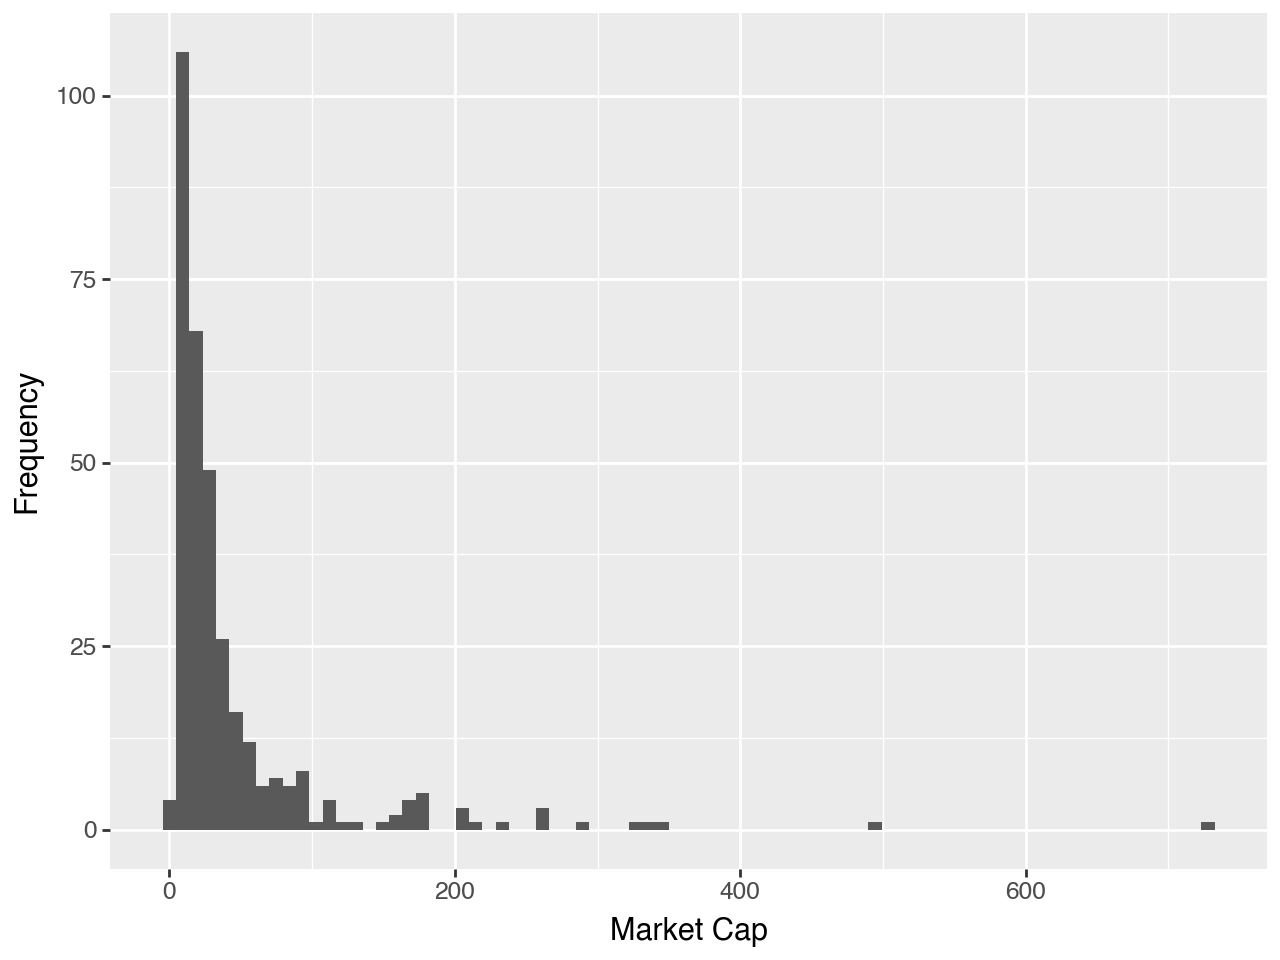

In [191]:
ggplot(cd) + aes(x = 'Market Cap')+ geom_histogram() + xlab('Market Cap') + ylab('Frequency')

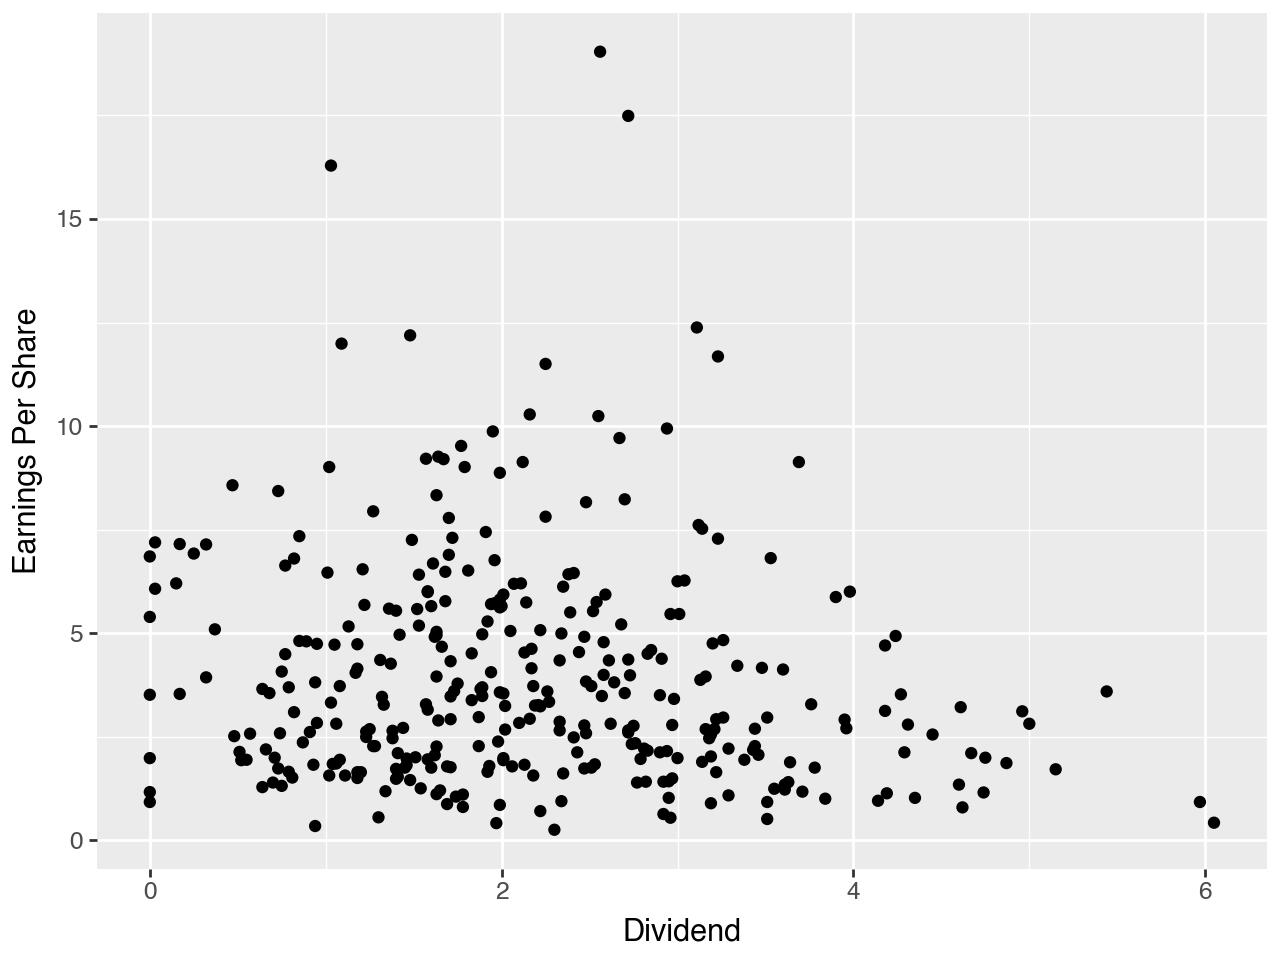

In [192]:
ggplot(cd) + aes(x = 'Dividend', y = 'EPS') + geom_point() + ylab('Earnings Per Share')

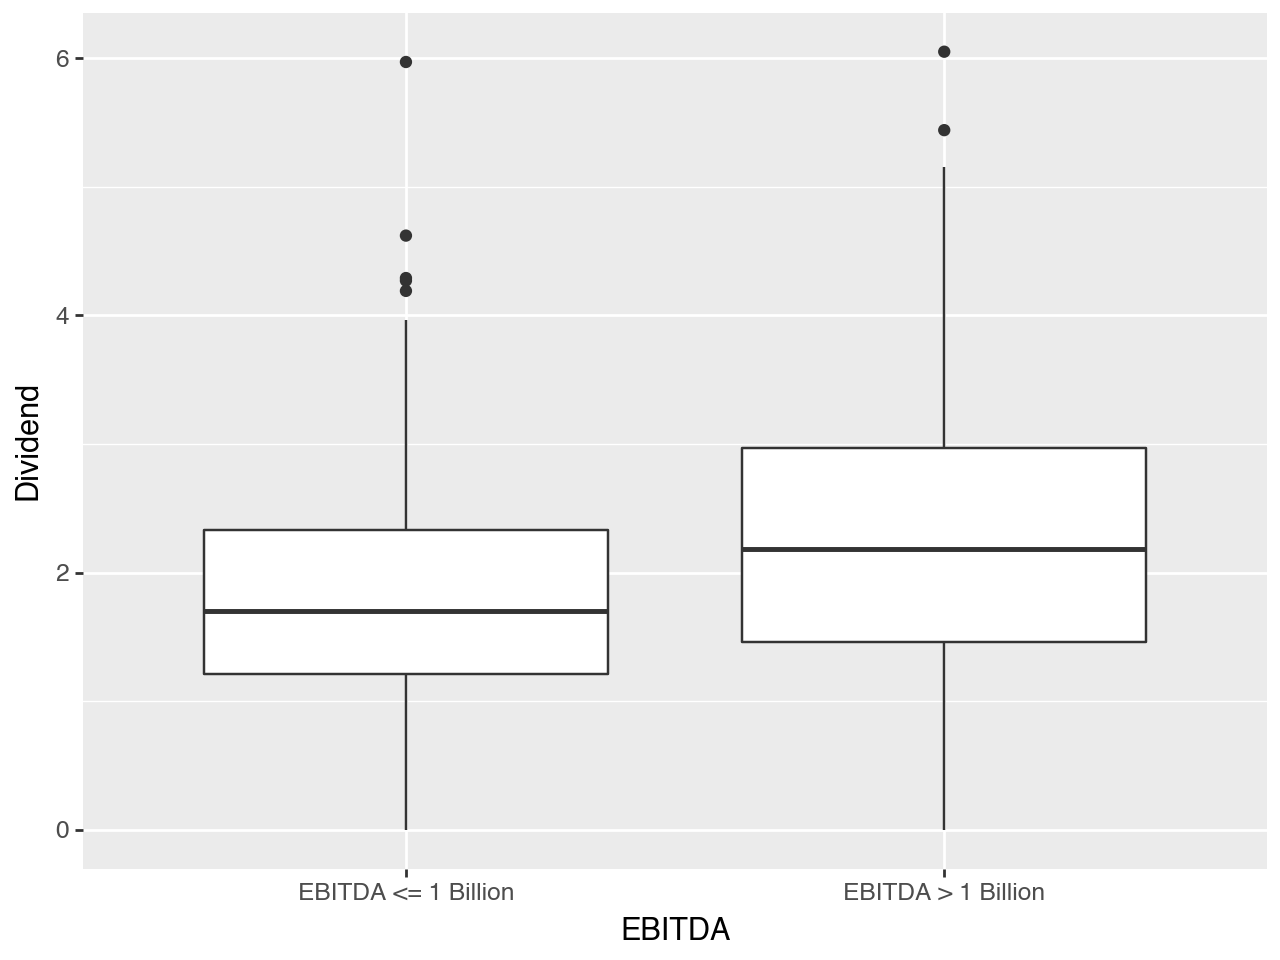

In [193]:
EBITDA = cd['EBITDAbooleanValue'].astype(bool)
Dividend = cd['Dividend']
boxplotData = pd.DataFrame({'EBITDAbooleanValue': EBITDA,
                            'Dividend': Dividend})
ggplot(boxplotData) + aes(x ='EBITDAbooleanValue' , y ='Dividend') + geom_boxplot() + scale_x_discrete(labels=['EBITDA <= 1 Billion','EBITDA > 1 Billion'])+ xlab('EBITDA')